$\textbf{PROGRAMMING ASSIGNMENT - Lecture 7}$
---

1. Subsample dataset and create Correlation Plot
2. Check for imbalanced target variable
3. Pairplot dataset
4. CLustermap to explore relationships
5. Perform SVM modelling, and check performance of model
6. Improve performance using GridSearchCV

---
Data: [Page Blocks Classification](https://archive.ics.uci.edu/dataset/78/page+blocks+classification)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

### $\textbf{Exploratory Data Analysis}$

In [2]:
page_blocks_classification = fetch_ucirepo(id=78)
page_blocks_classification.variables

,name,role,type,demographic,description,units,missing_values
0,height,Feature,Integer,None,Height of the block,None,no
1,length,Feature,Integer,None,Length of the block,None,no
2,area,Feature,Integer,None,Area of the block (height * length),None,no
3,eccen,Feature,Continuous,None,Eccentricity of the block (length / height),None,no
4,p_black,Feature,Continuous,None,Percentage of black pixels within the block (b...,None,no
5,p_and,Feature,Continuous,None,Percentage of black pixels after the applicati...,None,no
6,mean_tr,Feature,Continuous,None,Mean number of white-black transitions (blackp...,None,no
7,blackpix,Feature,Integer,None,Total number of black pixels in the original b...,None,no
8,blackand,Feature,Integer,None,Total number of black pixels in the bitmap of ...,None,no
9,wb_trans,Feature,Integer,None,Number of white-black transitions in the origi...,None,no


In [3]:
page_blocks_classification.data.features.head()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4


In [4]:
page_blocks_classification.data.targets.head()

,class
0,1
1,1
2,1
3,1
4,1


In [5]:
df = pd.merge(page_blocks_classification.data.features, page_blocks_classification.data.targets, left_index=True, right_index=True)
df.head()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1


In [6]:
df.isna().sum()

height      0
length      0
area        0
eccen       0
p_black     0
p_and       0
mean_tr     0
blackpix    0
blackand    0
wb_trans    0
class       0
dtype: int64

In [7]:
df.describe()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
count,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000
mean,10.473232,89.568244,1198.405628,13.753977,0.368642,0.785053,6.219278,365.930751,741.108167,106.662891,1.202631
std,18.960564,114.721758,4849.376950,30.703737,0.177757,0.170661,69.079021,1270.333082,1881.504302,167.308362,0.721470
min,1.000000,1.000000,7.000000,0.007000,0.052000,0.062000,1.000000,7.000000,7.000000,1.000000,1.000000
25%,7.000000,17.000000,114.000000,2.143000,0.261000,0.679000,1.610000,42.000000,95.000000,17.000000,1.000000
50%,8.000000,41.000000,322.000000,5.167000,0.337000,0.803000,2.070000,108.000000,250.000000,49.000000,1.000000
75%,10.000000,107.000000,980.000000,13.625000,0.426000,0.927000,3.000000,284.000000,718.000000,126.000000,1.000000
max,804.000000,553.000000,143993.000000,537.000000,1.000000,1.000000,4955.000000,33017.000000,46133.000000,3212.000000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473 entries, 0 to 5472
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   height    5473 non-null   int64  
 1   length    5473 non-null   int64  
 2   area      5473 non-null   int64  
 3   eccen     5473 non-null   float64
 4   p_black   5473 non-null   float64
 5   p_and     5473 non-null   float64
 6   mean_tr   5473 non-null   float64
 7   blackpix  5473 non-null   int64  
 8   blackand  5473 non-null   int64  
 9   wb_trans  5473 non-null   int64  
 10  class     5473 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 470.5 KB


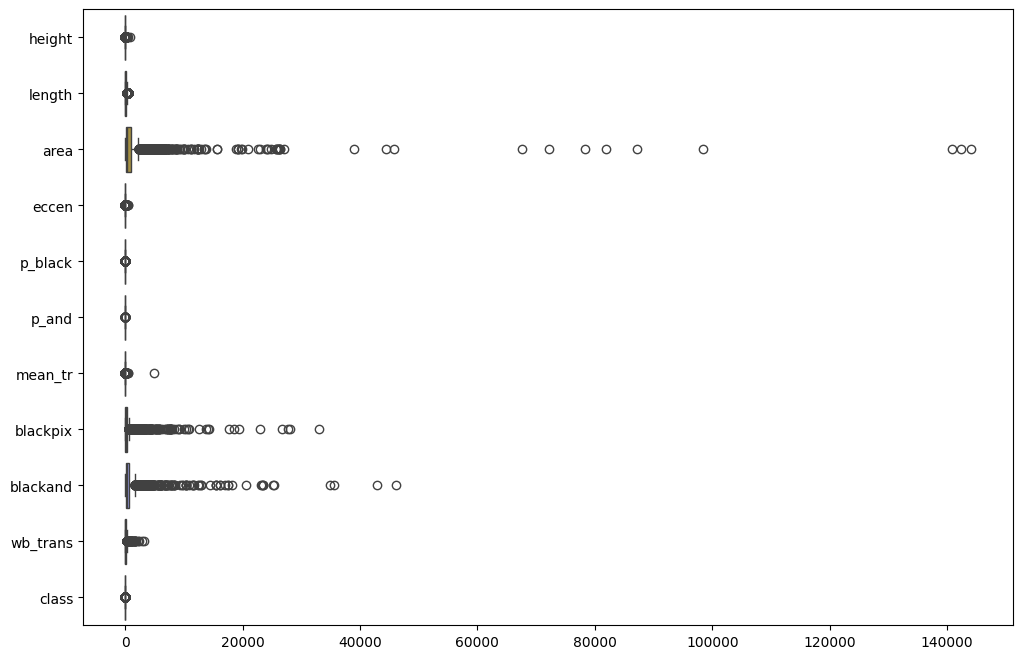

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')
plt.show()

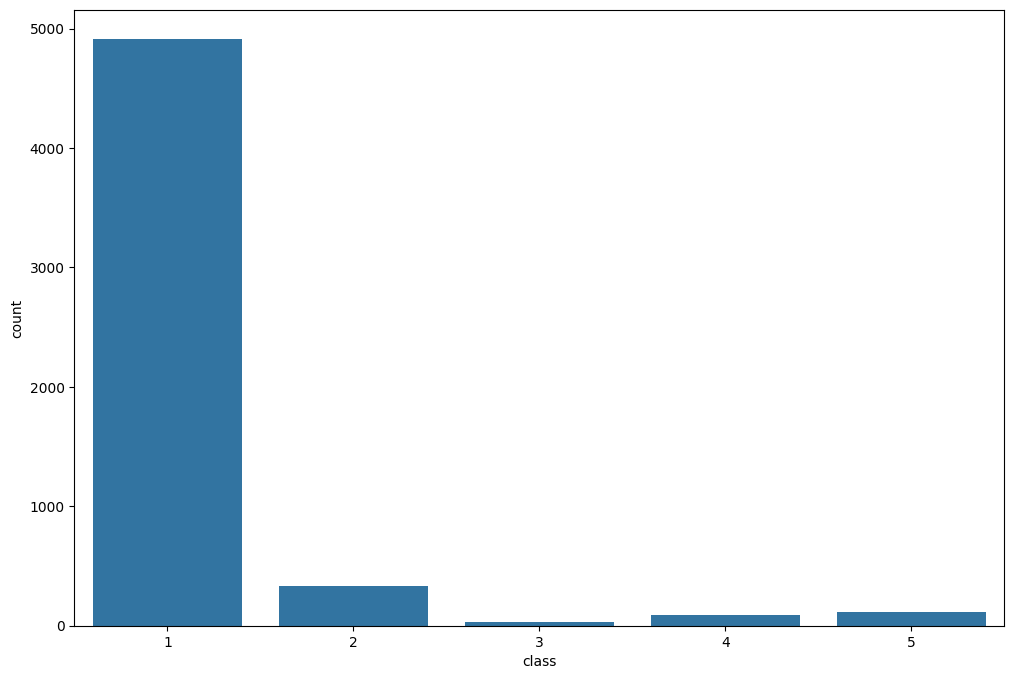

In [10]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x="class")
plt.show()

<Figure size 1200x800 with 0 Axes>

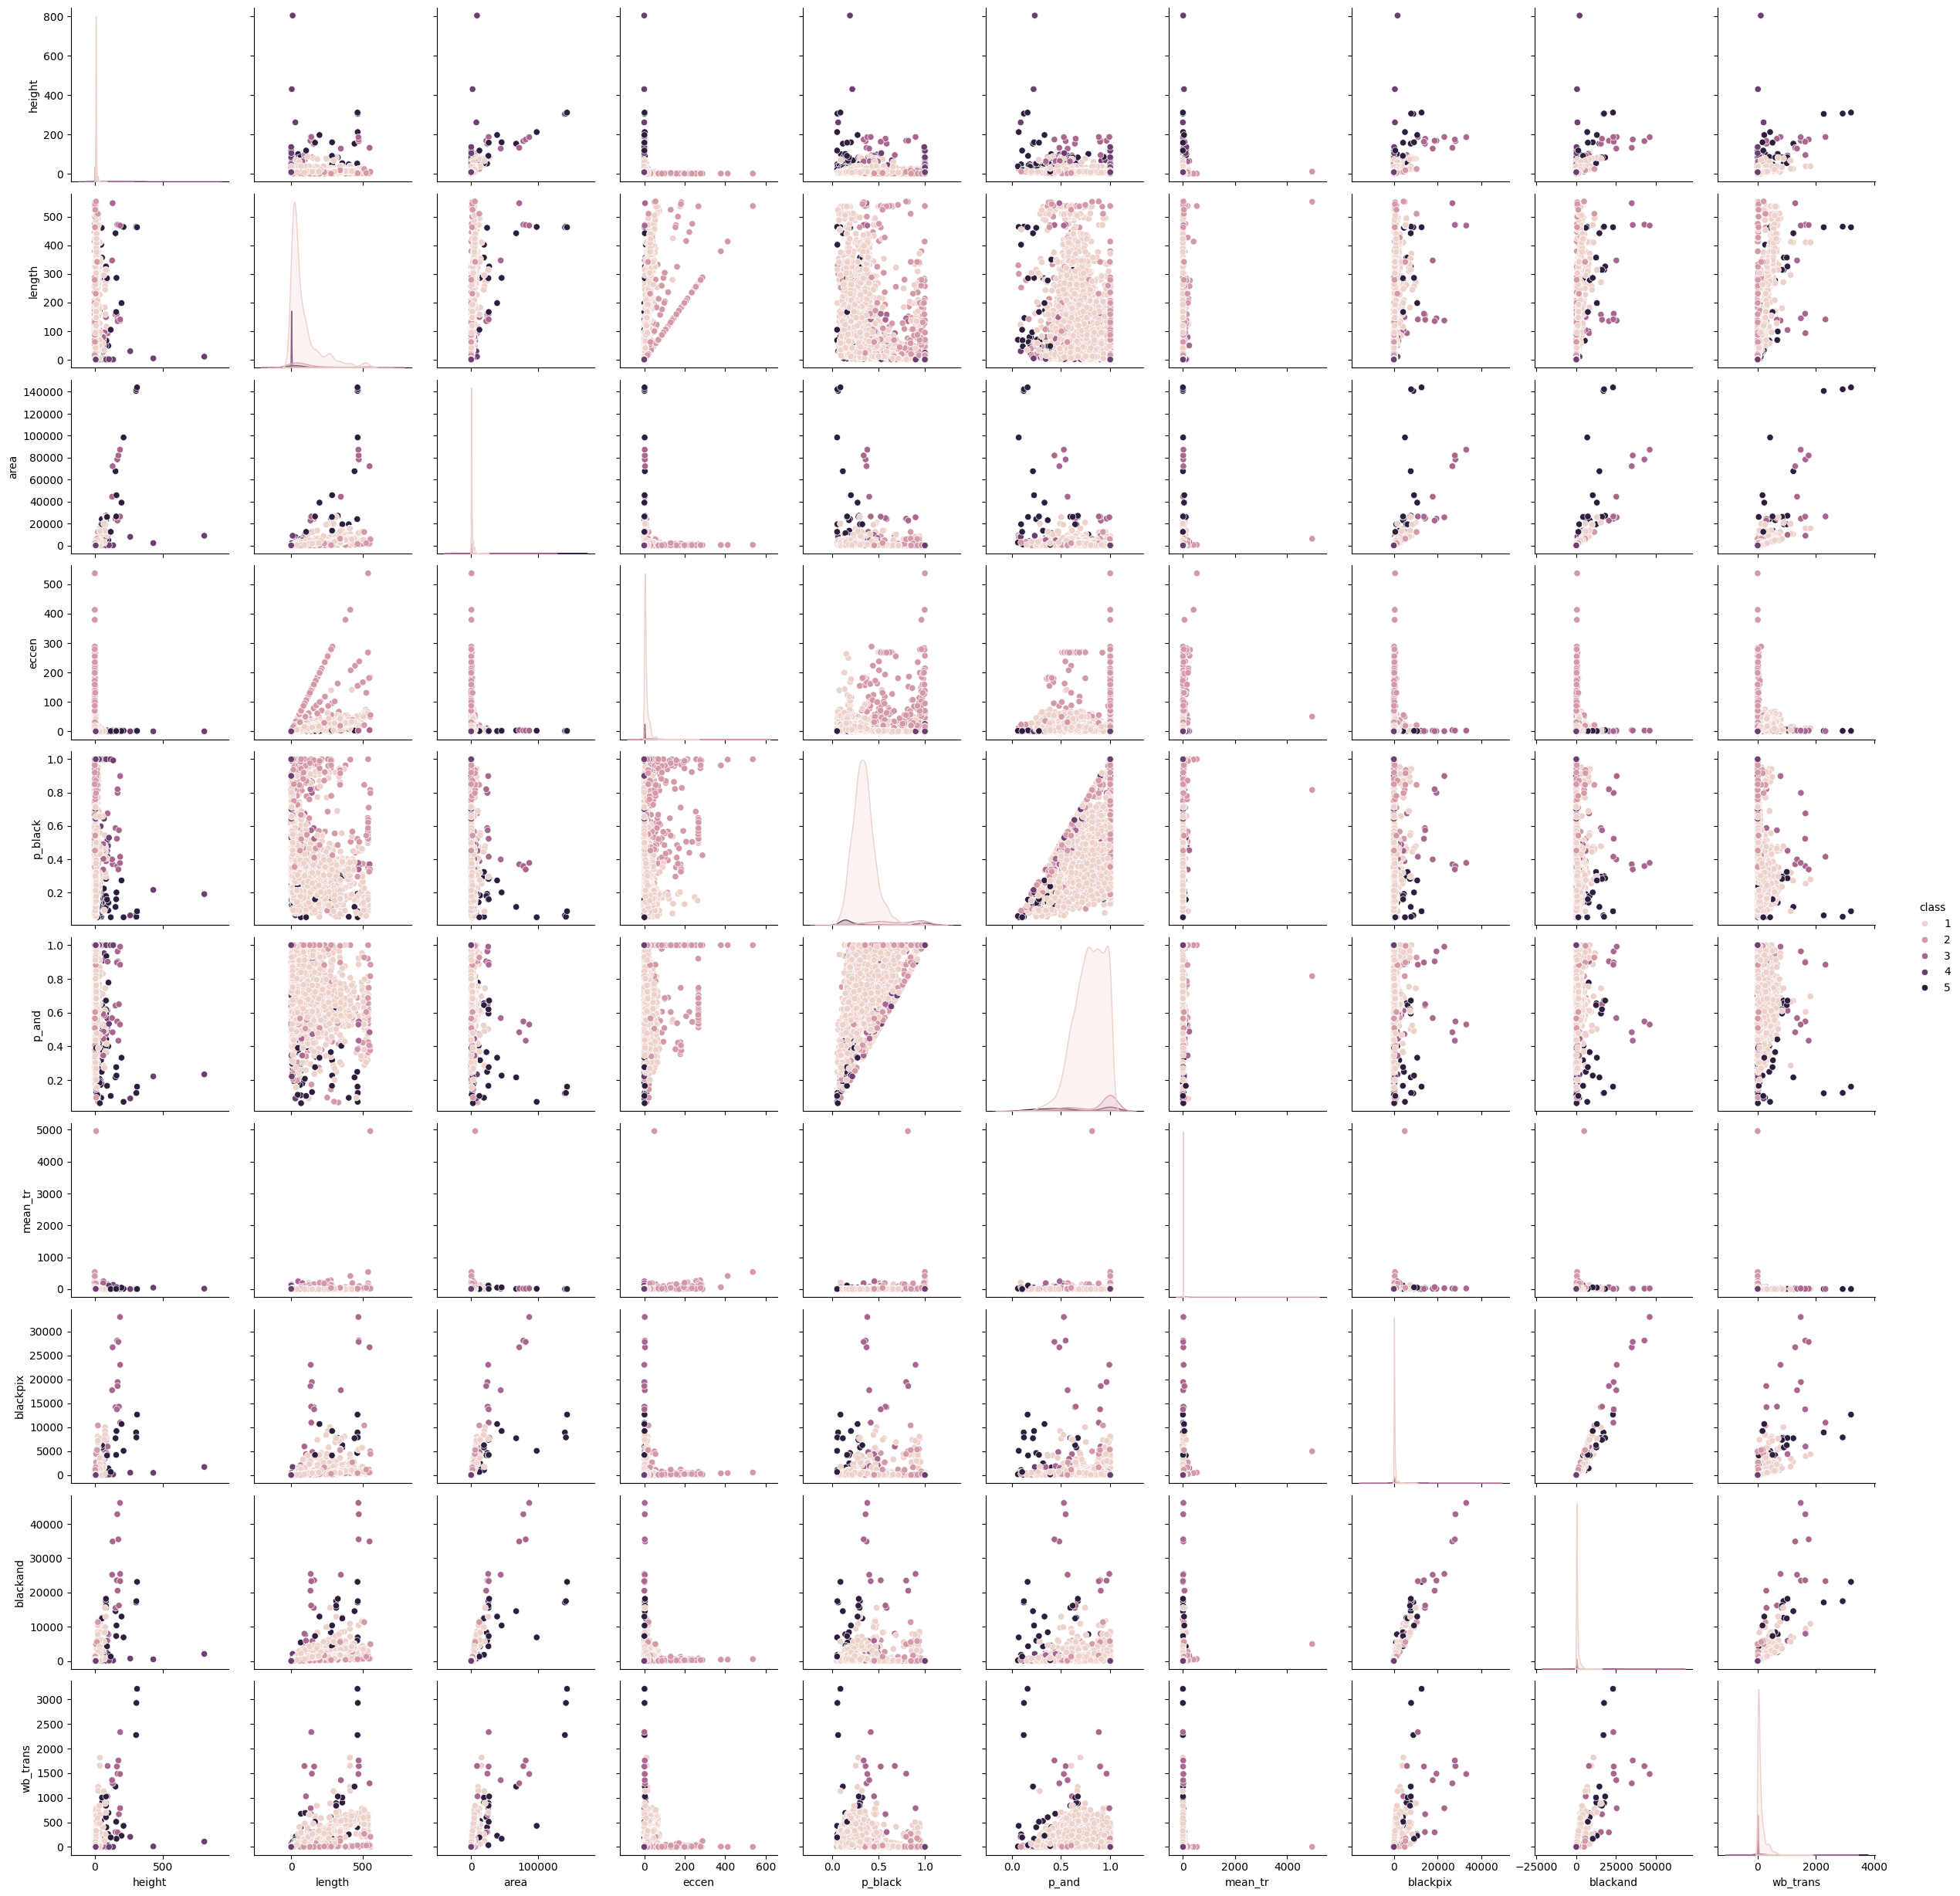

In [11]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue="class")
plt.show()

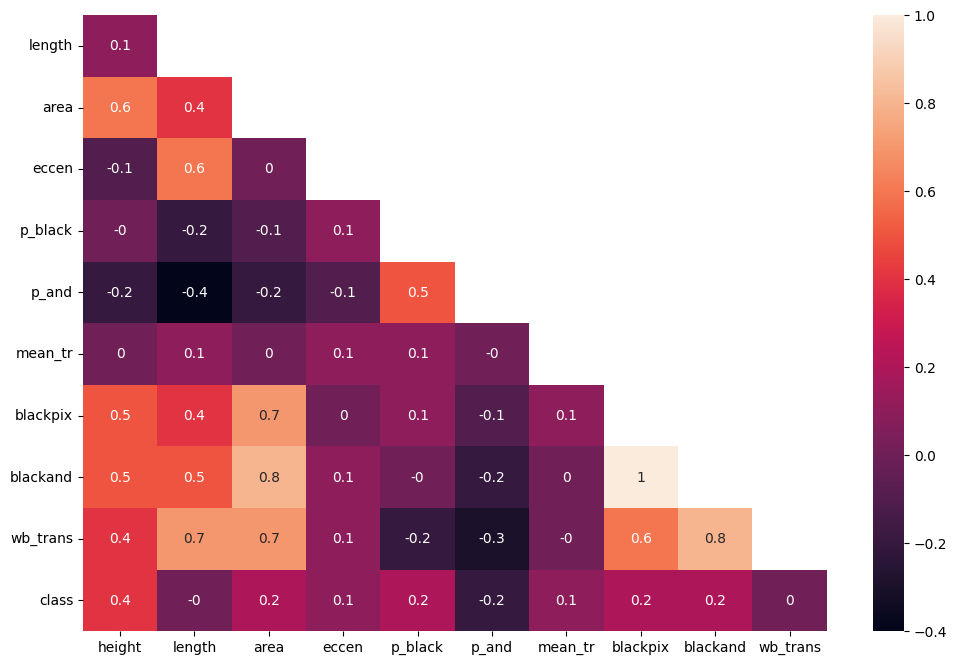

In [12]:
corr = df.corr().round(1)

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12, 8))
sns.heatmap(corr.mask(mask).dropna(how='all').dropna(how='all', axis=1), annot=True)
plt.show()

### $\textbf{Subsampling and Correlation}$

**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

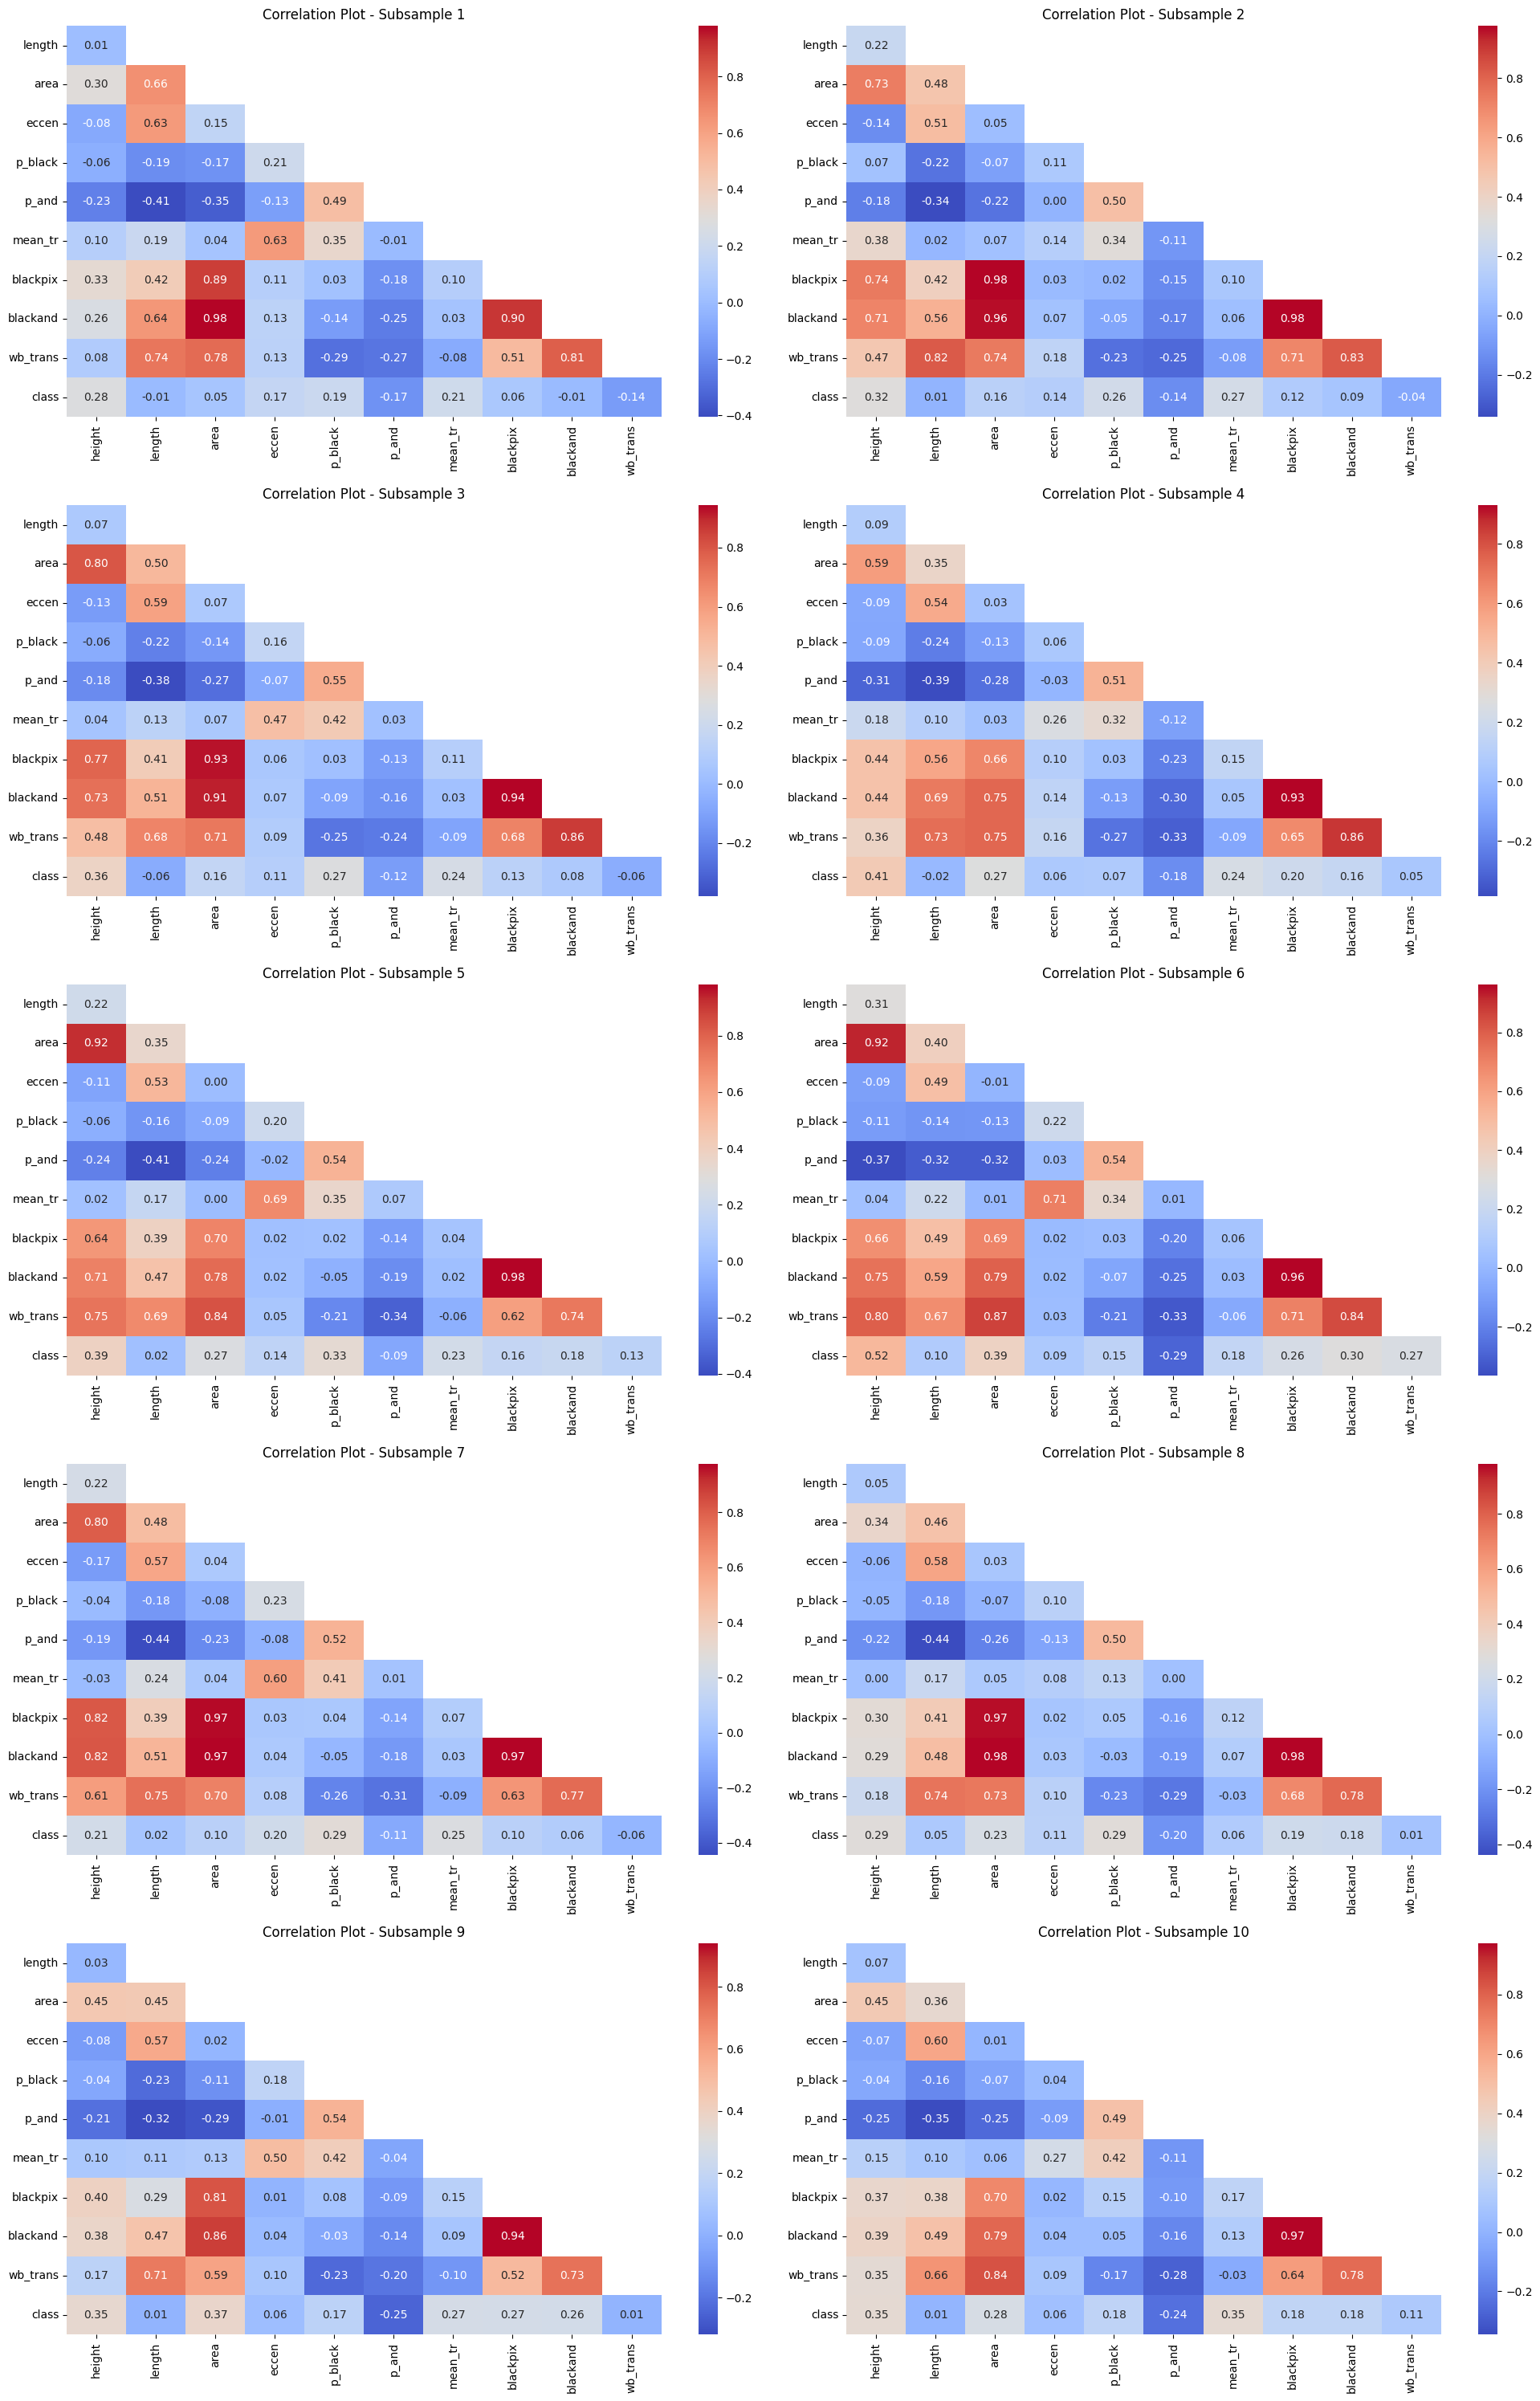

In [13]:
num_subsamples = 10
subsample_size = len(df) // num_subsamples

correlation_plots = []

num_cols = 2
num_rows = num_subsamples // num_cols
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 30))

for i in range(10):
    row, col = i // num_cols, i % num_cols
    subsample = df.sample(n=subsample_size)

    corr_matrix = subsample.corr()
    mask = np.zeros_like(corr_matrix, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(corr_matrix.mask(mask).dropna(how='all').dropna(how='all', axis=1), annot=True, cmap='coolwarm', fmt=".2f", ax=ax[row, col])
    ax[row, col].set_title(f'Correlation Plot - Subsample {i + 1}')

plt.tight_layout()
plt.show()

### $\textbf{Imbalanced Dataset Checking}$

**TASK (Classification): If your problem is a classification problem visually check if the target variable is imbalanced**

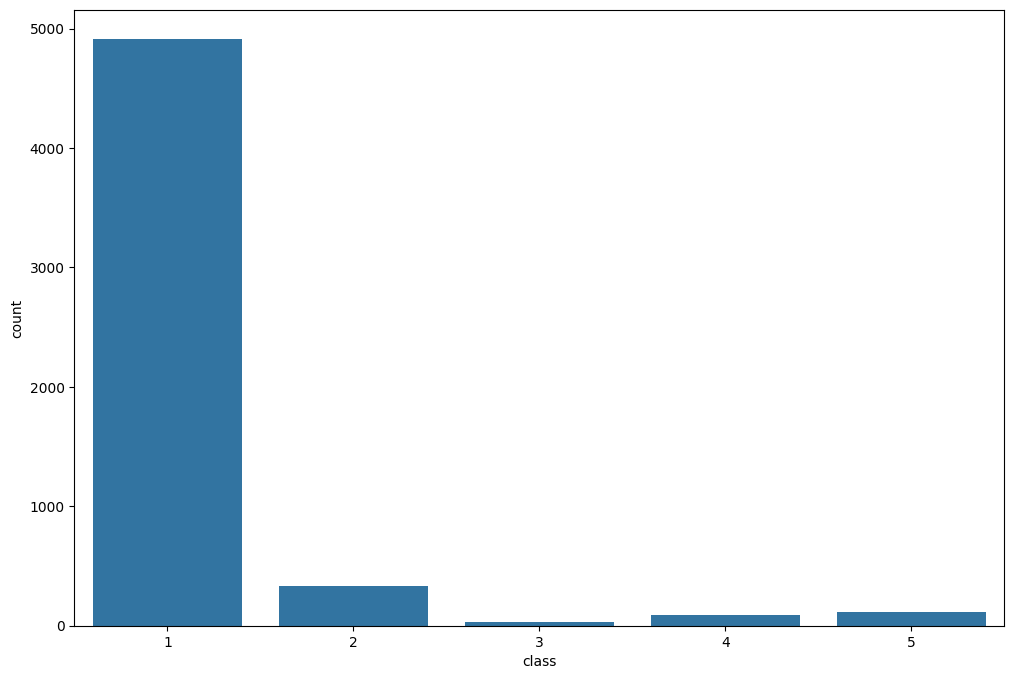

In [14]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x="class")
plt.show()

This will be dealt with when using `GridSearchCV` later on, by utilizing the `class_weight` parameter of `SVC`.

### $\textbf{Subsampling and Pairplotting}$

**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

<Figure size 2400x1600 with 0 Axes>

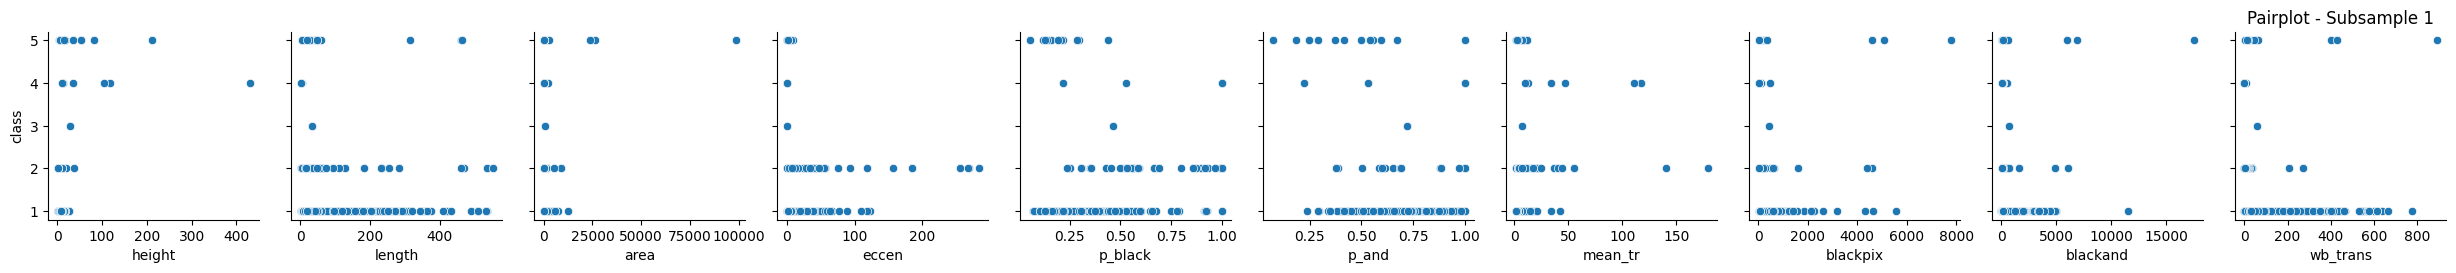

<Figure size 2400x1600 with 0 Axes>

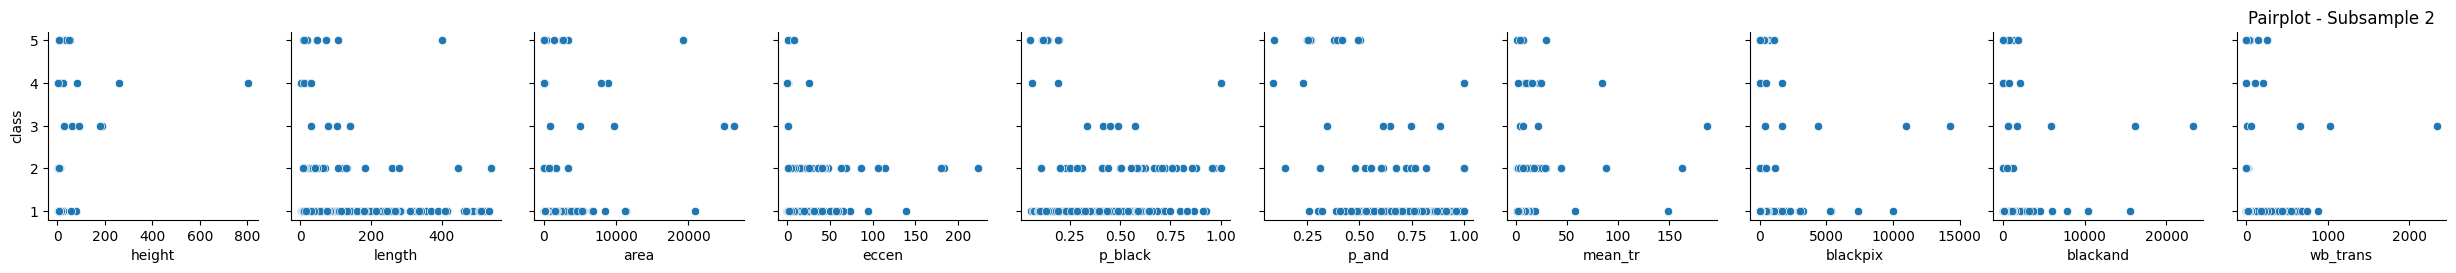

<Figure size 2400x1600 with 0 Axes>

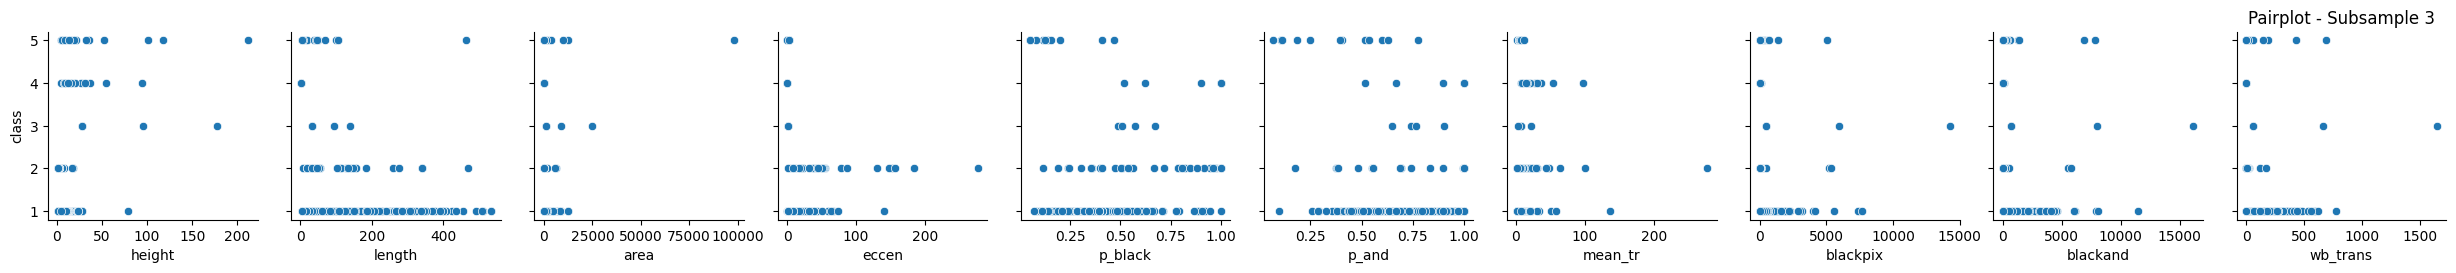

<Figure size 2400x1600 with 0 Axes>

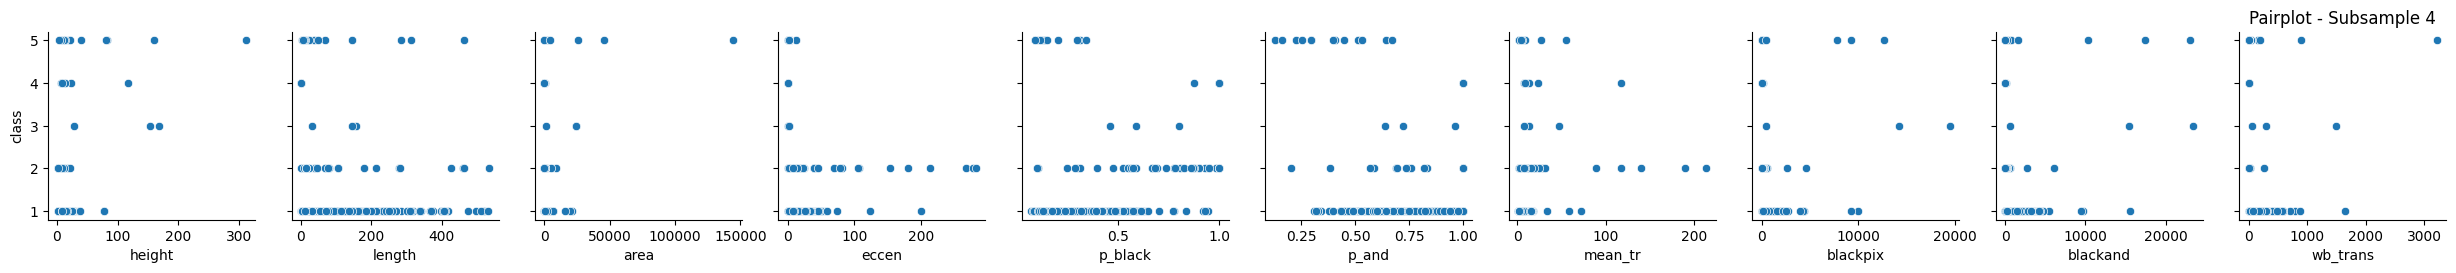

<Figure size 2400x1600 with 0 Axes>

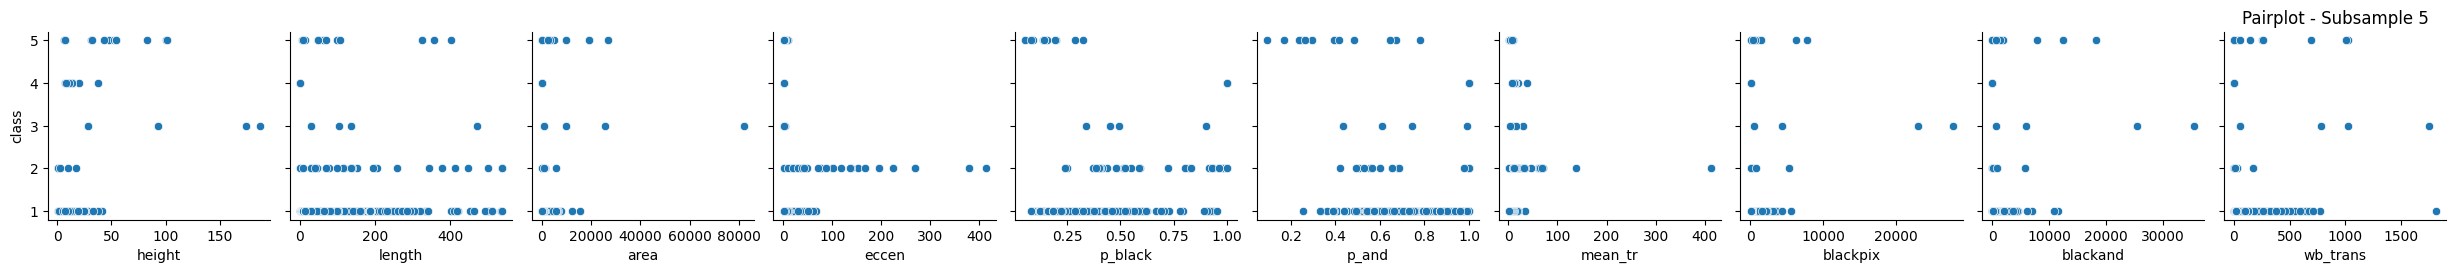

<Figure size 2400x1600 with 0 Axes>

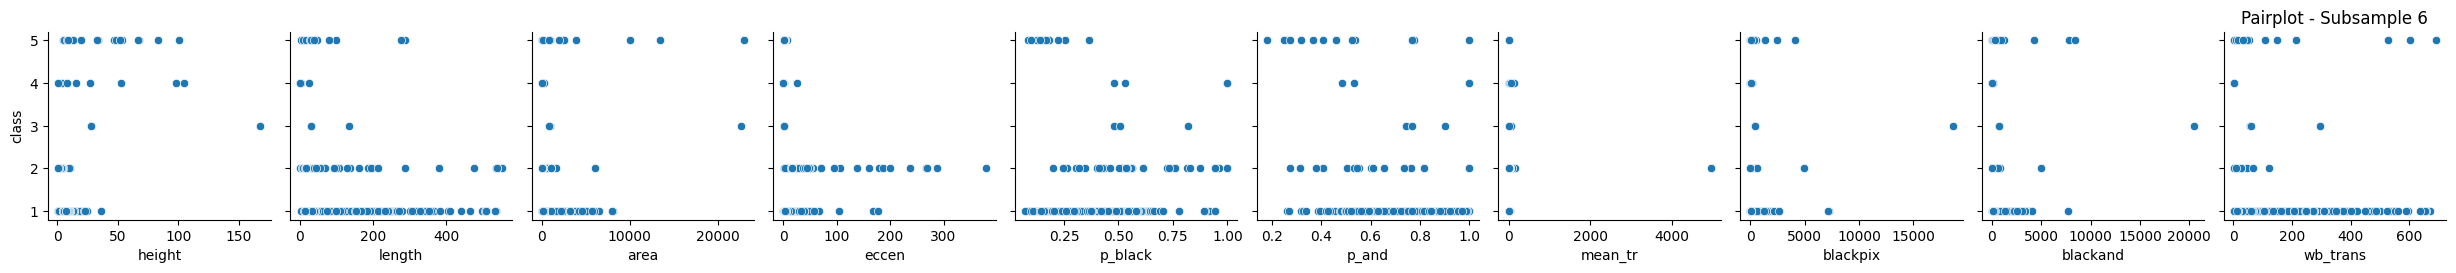

<Figure size 2400x1600 with 0 Axes>

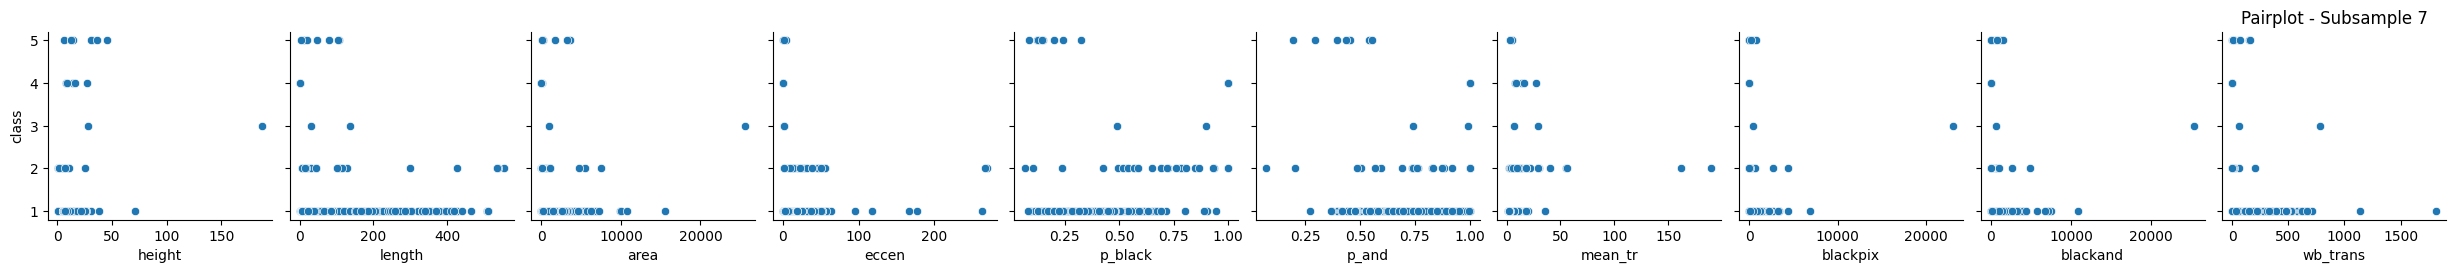

<Figure size 2400x1600 with 0 Axes>

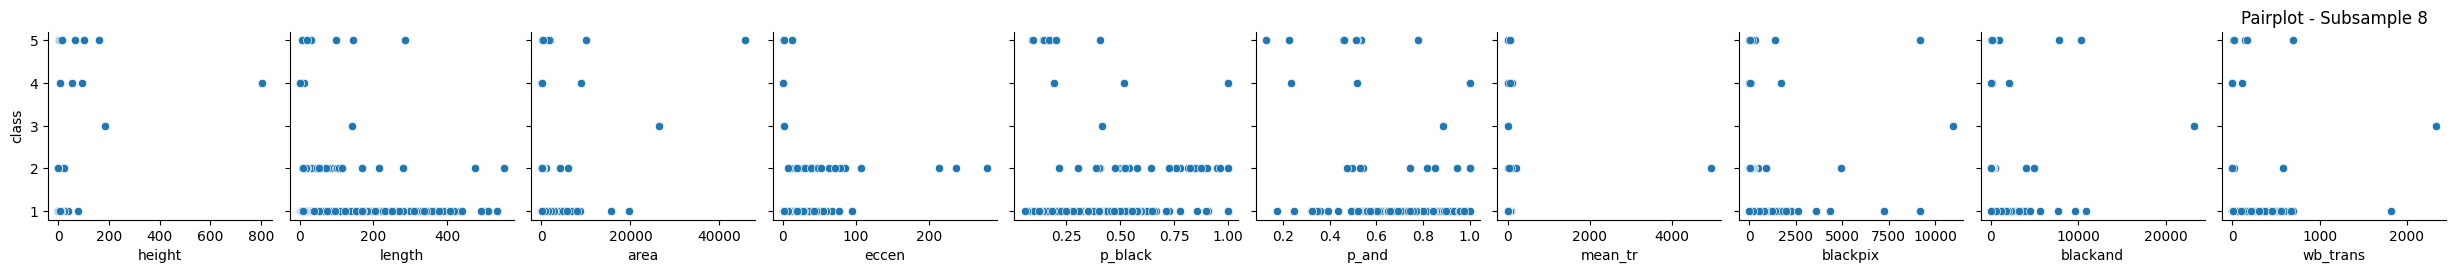

<Figure size 2400x1600 with 0 Axes>

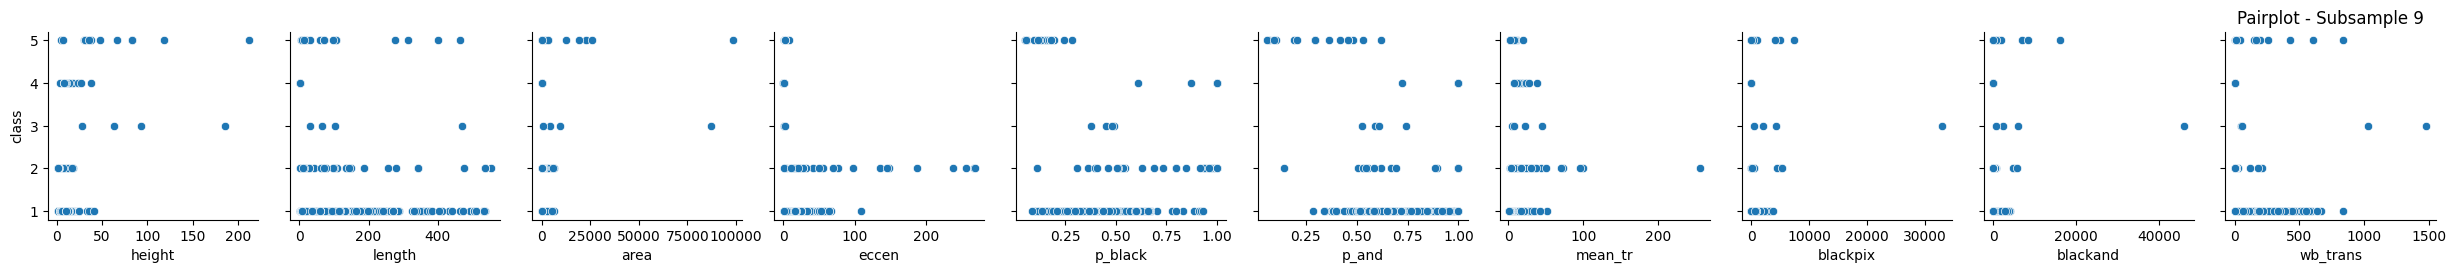

<Figure size 2400x1600 with 0 Axes>

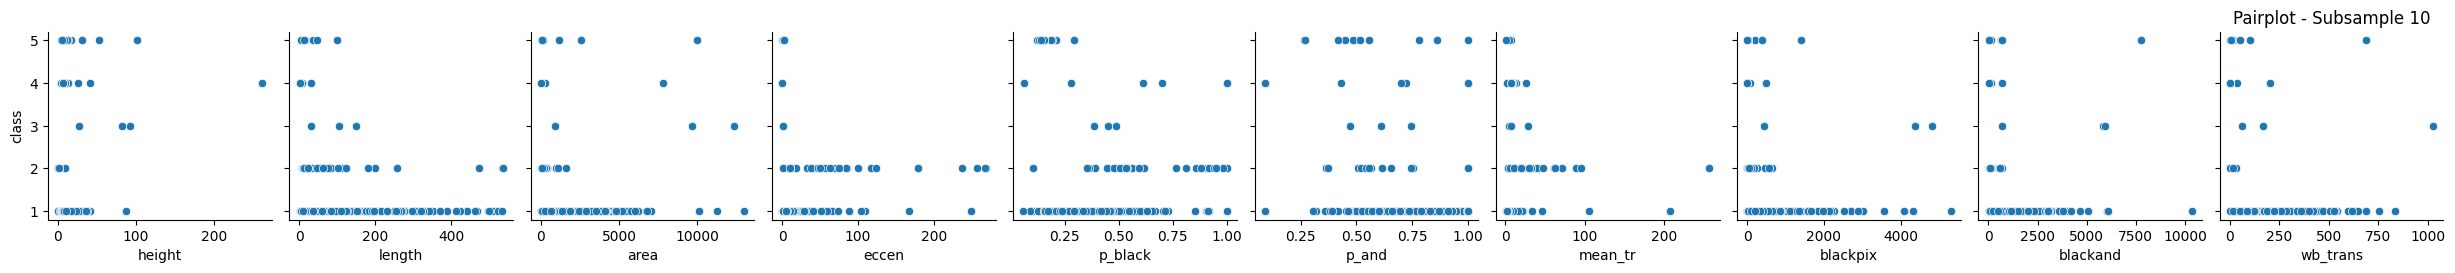

In [15]:
num_subsamples = 10
subsample_size = len(df) // num_subsamples

for i in range(10):
    row, col = i // num_cols, i % num_cols
    subsample = df.sample(n=subsample_size)

    plt.figure(figsize=(12, 8), dpi=200)
    sns.pairplot(subsample, x_vars=subsample.drop(columns=['class']).columns, y_vars=['class'])
    plt.title(f'Pairplot - Subsample {i + 1}')
    plt.show()


### $\textbf{Relationships Exploration}$

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

<Figure size 1200x800 with 0 Axes>

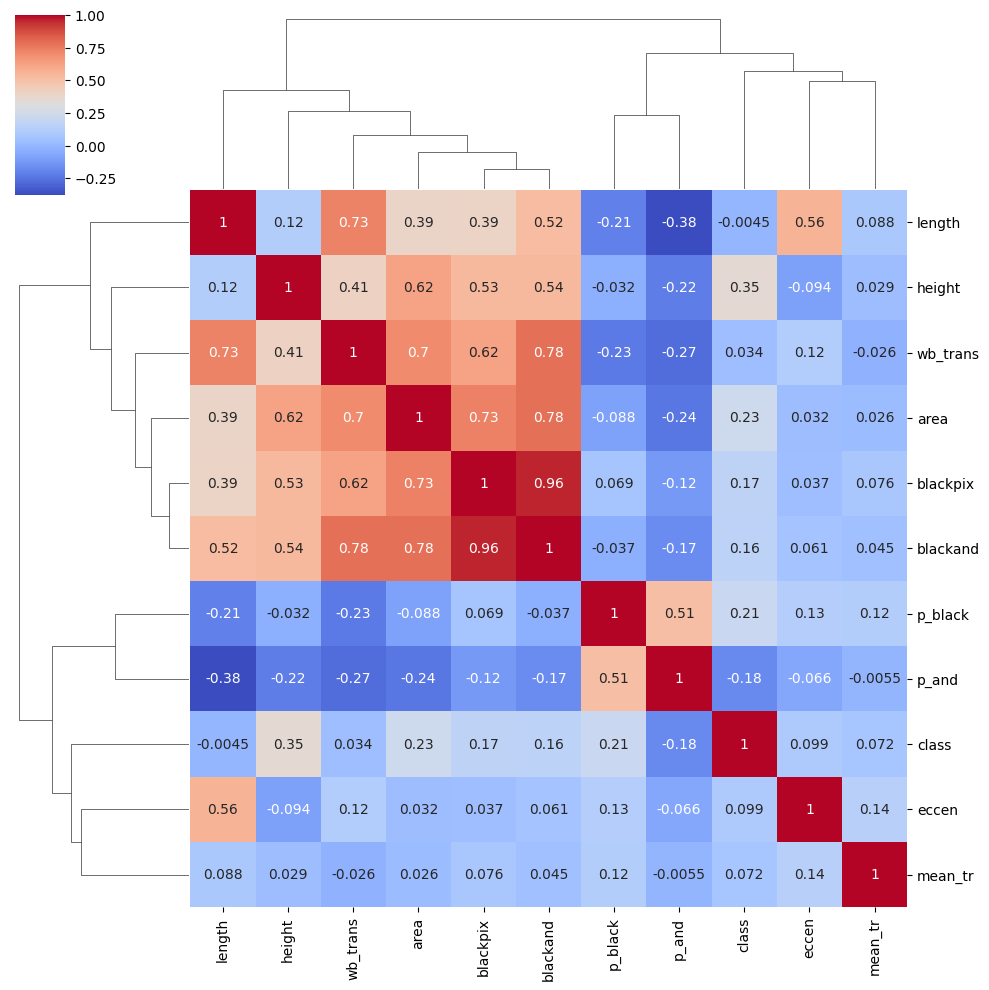

In [16]:
plt.figure(figsize=(12, 8))
sns.clustermap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

### $\textbf{Training-Testing Split and Preprocessing}$

In [17]:
X = df.drop(columns=['class'])
y = df['class']

In [18]:
X.head()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4


In [19]:
y.value_counts()

class
1    4913
2     329
5     115
4      88
3      28
Name: count, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42069)

In [21]:
X_train.head()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans
598,8,12,96,1.500,0.469,1.000,1.61,45,96,28
1066,7,14,98,2.000,0.490,0.939,2.53,48,92,19
2933,6,17,102,2.833,0.451,0.745,2.56,46,76,18
3404,8,39,312,4.875,0.304,0.756,1.38,95,236,69
4191,13,45,585,3.462,0.429,0.566,6.61,251,331,38


In [22]:
X_test.head()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans
501,9,37,333,4.111,0.390,0.811,2.03,130,270,64
1194,5,43,215,8.600,0.265,0.786,1.33,57,169,43
3507,8,344,2752,43.000,0.216,0.838,1.22,595,2307,486
4912,6,97,582,16.167,0.232,0.852,1.55,135,496,87
1842,7,32,224,4.571,0.277,0.830,1.41,62,186,44


In [23]:
y_train.value_counts()

class
1    3929
2     261
5      95
4      74
3      19
Name: count, dtype: int64

In [24]:
y_test.value_counts()

class
1    984
2     68
5     20
4     14
3      9
Name: count, dtype: int64

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [26]:
scaled_X_train

array([[-0.12664351, -0.67463639, -0.22151173, ..., -0.24979865,
        -0.3394192 , -0.4652343 ],
       [-0.17662505, -0.65713133, -0.22111067, ..., -0.24742127,
        -0.34154142, -0.51841435],
       [-0.2266066 , -0.63087375, -0.22030856, ..., -0.24900619,
        -0.35003033, -0.52432324],
       ...,
       [-0.2266066 ,  0.05182344, -0.1264619 , ..., -0.16975997,
        -0.15796889, -0.14615402],
       [-0.02668042,  1.41721782,  0.2625606 , ..., -0.00492782,
         0.43678491,  1.06516925],
       [-0.02668042,  1.59226839,  0.30266601, ...,  0.13692292,
         0.68508534,  1.65014975]])

In [27]:
scaled_X_test

array([[-0.07666196, -0.45582319, -0.17398681, ..., -0.18243936,
        -0.24710237, -0.25251412],
       [-0.27658814, -0.40330802, -0.19764901, ..., -0.24028911,
        -0.30068858, -0.37660089],
       [-0.12664351,  2.23120294,  0.31108814, ...,  0.18605558,
         0.83364115,  2.24103915],
       ...,
       [-0.47651432, -0.2107524 , -0.22772807, ..., -0.27515745,
        -0.35586645, -0.5597766 ],
       [-0.2266066 , -0.65713133, -0.22391805, ..., -0.2656479 ,
        -0.36276368, -0.54795882],
       [-0.17662505,  1.10212681,  0.0610309 , ...,  0.35643497,
         0.4028293 ,  0.86426685]])

### $\textbf{SVM Modelling}$

**TASK: Perform SVM modelling and check the performance of your model**

In [28]:
svc = SVC(class_weight='balanced', random_state=42069)
svc.fit(scaled_X_train, y_train)

SVC(class_weight='balanced', random_state=42069)

In [29]:
y_pred = svc.predict(scaled_X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.92      0.95       984
           2       0.71      0.96      0.81        68
           3       0.75      0.67      0.71         9
           4       0.44      1.00      0.61        14
           5       0.26      0.70      0.38        20

    accuracy                           0.92      1095
   macro avg       0.63      0.85      0.69      1095
weighted avg       0.95      0.92      0.93      1095



In [30]:
confusion_matrix(y_test, y_pred)

array([[903,  24,   2,  17,  38],
       [  1,  65,   0,   1,   1],
       [  0,   2,   6,   0,   1],
       [  0,   0,   0,  14,   0],
       [  5,   1,   0,   0,  14]])

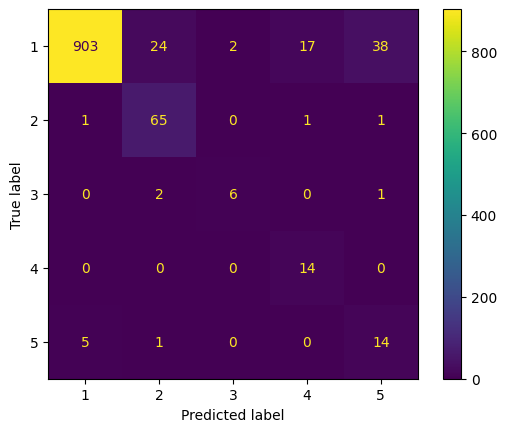

In [31]:
ConfusionMatrixDisplay.from_estimator(svc, scaled_X_test, y_test)

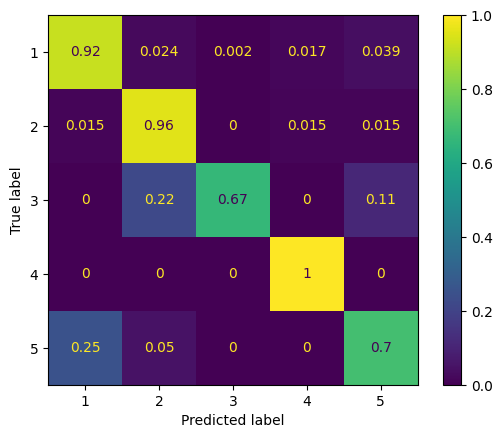

In [32]:
ConfusionMatrixDisplay.from_estimator(svc, scaled_X_test, y_test, normalize='true')

### $\textbf{Hyper-Parameter Tuningi and Performance Evaluation}$

**TASK: Improve the performance of your model using GridSearch**

In [33]:
svc = SVC(class_weight='balanced', random_state=42069)

param_grid = {
    'C': np.logspace(0.001, 3, 10),
    'kernel': ['linear', 'rbf', 'sigmoid'], # Won't add 'poly' kernel since it takes too long to converge
    'gamma': ['scale', 'auto'],
}

grid_cv = GridSearchCV(svc, param_grid, cv=5)
grid_cv.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=42069),
             param_grid={'C': array([   1.00230524,    2.15884878,    4.6499089 ,   10.01536236,
         21.57192436,   46.46341333,  100.0767823 ,  215.55373653,
        464.27765026, 1000.        ]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [34]:
grid_cv.best_params_

{'C': 1000.0, 'gamma': 'auto', 'kernel': 'rbf'}

In [35]:
best_model = grid_cv.best_estimator_
y_pred = best_model.predict(scaled_X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [36]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       949
           2       0.96      0.75      0.84        87
           3       0.56      0.71      0.62         7
           4       1.00      0.67      0.80        21
           5       0.55      0.35      0.43        31

    accuracy                           0.94      1095
   macro avg       0.80      0.69      0.73      1095
weighted avg       0.94      0.94      0.94      1095



In [37]:
confusion_matrix(y_pred, y_test)

array([[939,   2,   2,   0,   6],
       [ 17,  65,   2,   0,   3],
       [  2,   0,   5,   0,   0],
       [  6,   1,   0,  14,   0],
       [ 20,   0,   0,   0,  11]])

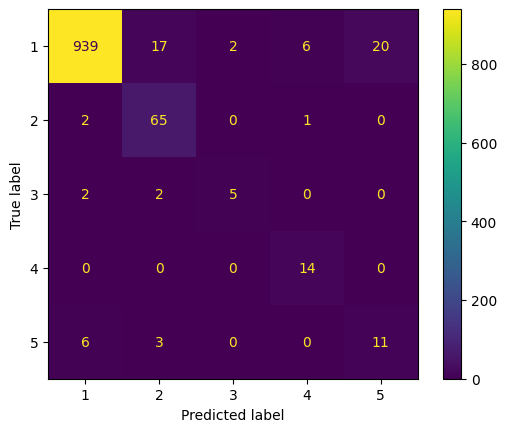

In [38]:
ConfusionMatrixDisplay.from_estimator(grid_cv, scaled_X_test, y_test)

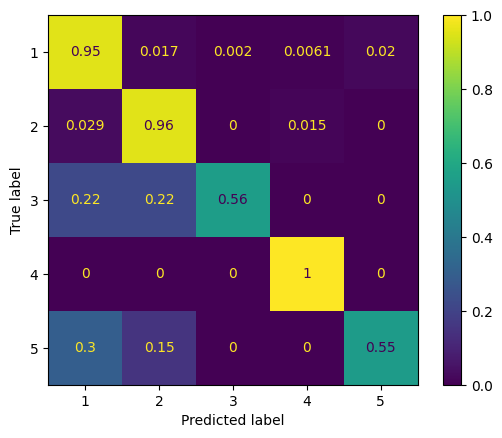

In [39]:
ConfusionMatrixDisplay.from_estimator(grid_cv, scaled_X_test, y_test, normalize='true')

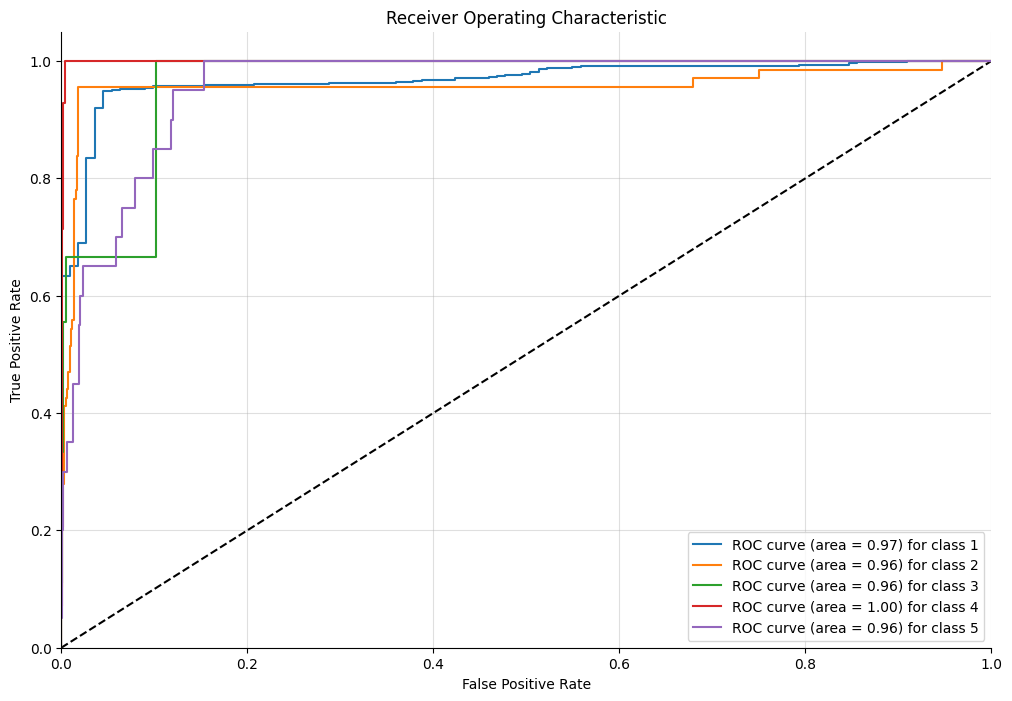

In [40]:
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
y_score = grid_cv.best_estimator_.decision_function(scaled_X_test)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(y_test_dummies[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fig, ax = plt.subplots(figsize=(12,8))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')

for i in range(len(y_test_dummies[0])):
    ax.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i] if not np.isnan(roc_auc[i]) else 0:.2f}) for class {i + 1}')

ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()